# Curvas de Validacao e Aprendizado (Learning Curve / Validation Curve)

**Aplicando em modelos de Classificacao com Arvores de Decisao**

Vamos classificar tumores em benignos ou malignos, baseado-se em diversos atributos destes.

## Imports, Carga de Dados, etc

#### Imports

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt
import numpy as np

#### Carga dos dados

**Breast Cancer Dataset**
http://scikit-learn.org/stable/datasets/index.html#datasets, section 5.14.

Colunas: mean, standard error, e "pior" valores para as 10 features abaixo, totalizando 30 features, seguidas da coluna com róótulos para as classes (malignant or benign).

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” - 1)

In [ ]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

### QUESTAO 01 - Plotando uma Learning Curve

Completar as linhas pendentes na funcao e fazer uma chamada a funcao na celula seguinte.

#### a) Declarando a funcao

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


b) Chamando a funcao criada:

[Text(0.609375, 0.9285714285714286, 'x[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.375, 0.7857142857142857, 'x[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.4921875, 0.8571428571428572, 'True  '),
 Text(0.171875, 0.6428571428571429, 'x[29] <= 0.055\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.140625, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.203125, 0.5, 'x[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.35714285714285715, 'x[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.21428571428571427, 'x[1] <= 19.9\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.07142857142857142, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.21428571428571427, 'x[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.07142857142857142, '

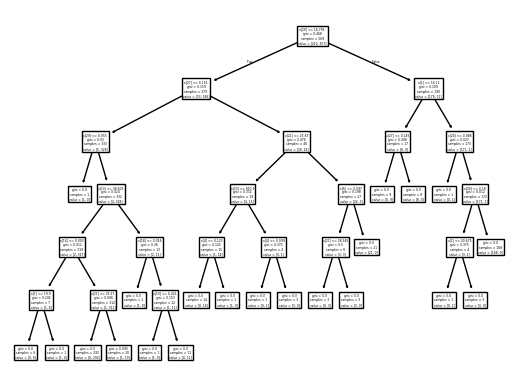

In [ ]:
est = DecisionTreeClassifier(max_depth=6)
est.fit(X, y)

from sklearn import tree
tree.plot_tree(est)


### QUESTAO 02 - Plotando uma Validation Curve

Completar as linhas pendentes na funcao e fazer uma chamada a funcao na celula seguinte.

#### a) Declarando a funcao

In [ ]:
def plot_validation_curve(param_range, train_scores, test_scores, title, param_name="Param Value", alpha=0.1):

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)

    plt.plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.show()


#### b) Chamando a funcao criada

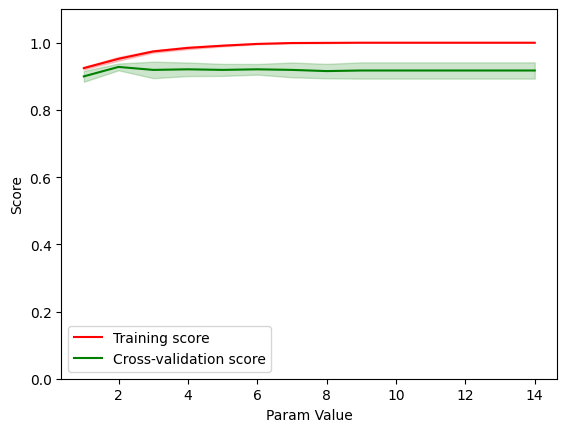

In [ ]:
param_name = "max_depth" # parametro a ser analisado
param_range = np.arange(1,15) # variacao do valor do parametro a ser analisado
est = DecisionTreeClassifier(random_state=42)

train_scores, test_scores = validation_curve(
    est, X, y,
    param_name=param_name,
    param_range=param_range,
    scoring="accuracy",
)

plot_validation_curve(param_range, train_scores, test_scores, "")
